# Анализ рейтинга и цены красных вин

Данные взяты с сайта Vivino

**Используемые колонки**

Name - Название вина

Country - Страна производства

Region - Регион

Winery - Винодельня

Rating - Рейтинг (на сайте Vivino)

Namber of ratings - Количество отзывов

Price - Цена

Year - Год производства

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
wine = pd.read_csv('Desktop/Red.csv')

Познакомимся с данными датасета

In [4]:
wine

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


In [5]:
wine.head()  #посмотрим первые пять рядов для изучения предоставленных данных

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


**При анализе данных будут изучены факторы, влияющие на рейтинг вина**

In [6]:
wine.shape   #посмотрим размер датасета

(8666, 8)

In [7]:
wine.info()    #посмотрим основную информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


*В данном датасете нет пропущенных значений*

In [8]:
wine['Country'].unique()  #посмотрим из каких стран оценивалось вино

array(['France', 'Italy', 'Austria', 'New Zealand', 'Chile', 'Australia',
       'South Africa', 'Spain', 'United States', 'Portugal', 'Hungary',
       'Brazil', 'Argentina', 'Romania', 'Germany', 'Greece', 'Mexico',
       'Moldova', 'Switzerland', 'Slovenia', 'Israel', 'Georgia',
       'Lebanon', 'Uruguay', 'Turkey', 'Croatia', 'China', 'Slovakia',
       'Bulgaria', 'Canada'], dtype=object)

In [9]:
wine['Year'].unique()  #посмотрим вина каких годов есть в датасете

array(['2011', '2017', '2015', '2019', '2016', '2014', '2013', '2018',
       '2012', '2010', '2007', '2005', '1999', '2002', '2008', '2006',
       '2009', 'N.V.', '2000', '2004', '2001', '1996', '1998', '1990',
       '1995', '2003', '1993', '1988', '1989', '1997', '1992', '1991'],
      dtype=object)

In [10]:
wine[wine['Country'] == 'Italy']  #выведем количество итальянских вин

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015
10,Chianti Riserva 2013,Italy,Chianti,Poggiotondo,3.9,100,20.95,2013
13,Zenas Primitivo 2018,Italy,Puglia,La Bollina,3.6,100,9.26,2018
...,...,...,...,...,...,...,...,...
8642,Barbaresco 2015,Italy,Barbaresco,Bera,3.9,99,23.30,2015
8648,Blu Onice Aglianico Irpinia 2017,Italy,Irpinia,Nativ,4.2,99,16.50,2017
8654,Scipio 2013,Italy,Toscana,Tenuta dei Sette Cieli,4.3,99,63.39,2013
8658,Bricco dell'Uccellone Barbera d'Asti 2016,Italy,Barbera d'Asti,Braida,4.3,990,52.00,2016


Видим, что итальянских вин 2650 шт

In [11]:
wine[wine['Year'] == '2017']  #выведем количество вин 2017 года

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017
12,Les Obriers de la Peira Terrasses du Larzac 2017,France,Terrasses du Larzac,La Pèira en Damaisèla,4.1,100,14.52,2017
14,Cuvée Confidence Côtes du Rhône Rouge 2017,France,Côtes-du-Rhône,Domaine Fond Croze,3.7,100,8.49,2017
30,Hécula Monastrell 2017,Spain,Yecla,Castaño,3.3,1004,8.83,2017
...,...,...,...,...,...,...,...,...
8631,Valpolicella Ripasso Superiore 2017,Italy,Valpolicella Ripasso,Cecilia Beretta,3.9,983,12.80,2017
8640,Colheita Red 2017,Portugal,Douro,Quinta do Portal,3.9,99,12.50,2017
8648,Blu Onice Aglianico Irpinia 2017,Italy,Irpinia,Nativ,4.2,99,16.50,2017
8655,Côtes du Rhône 'Les Cranilles' 2017,France,Côtes-du-Rhône,Les Vins de Vienne - Cuilleron-Gaillard-Villard,3.7,99,10.50,2017


В 2017 году было 1558 вин 

In [12]:
wine[(wine['Country'] == 'France') & (wine['Rating'] >= 4)].shape  #выведем количество французских вин с рейтингом больше 4

(1061, 8)

In [13]:
wine[(wine['Country'] == 'Italy') & (wine['Rating'] >= 4)].shape  #выведем количество итальянских вин с рейтингом больше 4

(1207, 8)

Можно сделать вывод, что вин с рейтингом выше 4 больше в Италии, чем во Франции

In [14]:
wine[(wine['Rating'] >= 4) & (wine['Price'] <= 10)]  #выведем количество хороших и недорогих вин

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
43,Roma Rosso 2018,Italy,Lazio,Poggio le Volpi,4.0,101,9.95,2018
116,Peyres Nobles Rouge 2018,France,Corbières,Château Camplong,4.0,103,6.50,2018
135,Gran Maestro Primitivo di Manduria 2017,Italy,Primitivo di Manduria,Maestro Italiano,4.1,1036,9.75,2017
291,Primitivo di Manduria 2018,Italy,Primitivo di Manduria,Terre di Campo Sasso,4.1,108,8.28,2018
302,Rondeur Appassimento 2018,France,Pays d'Oc,Domaine La Grange,4.2,108,9.37,2018
...,...,...,...,...,...,...,...,...
8181,Barrica 2016,Spain,Cigales,El Perdiguero,4.0,87,7.45,2016
8291,Mandus Primitivo di Manduria 2018,Italy,Primitivo di Manduria,Pietra Pura,4.0,90,7.63,2018
8357,Papale Primitivo di Manduria 2017,Italy,Primitivo di Manduria,Varvaglione,4.0,913,9.70,2017
8464,Primitivo di Manduria 2018,Italy,Primitivo di Manduria,Menhir,4.0,94,7.58,2018


In [15]:
wine[(wine['Rating'] >= 4) & (wine['Price'] <= 10) & (wine['Country'] == 'Italy')]  
#выведем количество хороших и недорогих итальянских вин

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
43,Roma Rosso 2018,Italy,Lazio,Poggio le Volpi,4.0,101,9.95,2018
135,Gran Maestro Primitivo di Manduria 2017,Italy,Primitivo di Manduria,Maestro Italiano,4.1,1036,9.75,2017
291,Primitivo di Manduria 2018,Italy,Primitivo di Manduria,Terre di Campo Sasso,4.1,108,8.28,2018
449,Bel Noce Primitivo 2017,Italy,Salento,Cantina Rosa del Golfo,4.2,113,9.78,2017
766,Primitivo Salento Pilùna 2018,Italy,Salento,Castello Monaci,4.0,1247,6.90,2018
...,...,...,...,...,...,...,...,...
7844,3 Passo Rosso 2018,Italy,Vino d'Italia,Cielo e Terra,4.0,794,7.90,2018
8026,Appassite Negroamaro - Primitivo 2019,Italy,Puglia,Luna Argenta,4.0,84,7.52,2019
8291,Mandus Primitivo di Manduria 2018,Italy,Primitivo di Manduria,Pietra Pura,4.0,90,7.63,2018
8357,Papale Primitivo di Manduria 2017,Italy,Primitivo di Manduria,Varvaglione,4.0,913,9.70,2017


**Хороших и недорогих итальянских вин всего 73.** 
Под хорошими винами подразумеваются вина с рейтингом больше 4, под недорогими винами - стоимость меньше 10

In [16]:
wine['Rating'].sort_values(ascending = False) #отсортируем данные по убыванию рейтинга

3420    4.8
3747    4.8
8086    4.8
4031    4.8
951     4.8
       ... 
7091    2.8
4542    2.7
4176    2.6
4998    2.5
6335    2.5
Name: Rating, Length: 8666, dtype: float64

Можем сделать вывод, что максимальная оценка вина 4.8, а минимальная 2.5

In [17]:
wine['Price'].sort_values(ascending = False) #отсортируем данные по убыванию цены

2344    3410.79
7466    1599.95
5560    1399.00
4395    1266.25
4124    1197.90
         ...   
7821       3.99
108        3.95
6408       3.79
2938       3.70
5423       3.55
Name: Price, Length: 8666, dtype: float64

Можем сделать вывод, что максимальная стоимость вина 3410.79, а минимальная 3.55

**Далее добавим дополнительные переменные**

In [18]:
def get_rating_cat (rating):    #прописываем функцию для добавления новых переменных
    if rating >= 4.5:
        return 'Great'
    elif rating >= 4.0:
        return 'Good'
    elif rating >= 3.2:
        return 'Mediocre'
    elif rating >= 2.5:
        return 'Not recommended'

In [19]:
wine['Rating Category'] = wine['Rating'].apply(get_rating_cat)  #создаем новую переменную Rating Category

In [20]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre


Новая переменная Rating Category (категория рейтинга) позволит анализировать рейтинг вина относительно других показателей. Данные были разбиты на 4 категории: если рейтинг был выше или равен 4.5, то присваивалась категория **"Great"**; если рейтинг от 4.0 до 4.4, то присваивался рейтинг **"Good"**; категория **"Mediocre"** проставлялась при рейтинге от 3.2 до 3.9; при рейтинге меньше 3.2 - категория **"Not recommended"**

In [21]:
def get_price_cat (price):    #прописываем функцию для добавления новых переменных
    if price <= 20:
        return 'Low'
    elif price <= 250:
        return 'Medium'
    elif price > 250:
        return 'High'

In [22]:
wine['Price Category'] = wine['Price'].apply(get_price_cat)  #создаем новую переменную Price Category

In [23]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good,Medium
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good,Low
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre,Low
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre,Low
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre,Medium


Новая переменная Price Category (категория цены) позволит анализировать рейтинг вина относительно других показателей. Данные были разбиты на 3 категории: если цена была ниже или равна 20, то присваивалась категория **"Low"**; если цена от 20 до 250, то присваивалась категория **"Medium"**; при цене выше 250 - категория **"High"**

***Определим список бюджетных вин, рекомендованных к покупке***

In [24]:
wine['Recommended budget wines'] = np.where((wine['Rating Category'] == 'Great') &
                                           (wine['Price Category'] == 'Low'), 1, 0)  #создаем дополнительную переменную 

In [25]:
wine.head() 

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category,Recommended budget wines
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good,Medium,0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good,Low,0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre,Low,0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre,Low,0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre,Medium,0


In [26]:
wine['Recommended budget wines'].sum()

0

При создании новой переменной видно что нет ни одного вина, имеющего рейтинг выше 4.5 и стоимость меньше 20, поэтому перезаписываем данную переменную, снижаем рейтинг вина до 4.0

In [27]:
wine['Recommended budget wines'] = np.where((wine['Rating Category'] == 'Good') &
                                           (wine['Price Category'] == 'Low'), 1, 0)

In [28]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category,Recommended budget wines
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good,Medium,0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good,Low,1
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre,Low,0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre,Low,0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre,Medium,0


In [29]:
wine['Recommended budget wines'].sum()

718

В итоге получам бинарную переменную, где под "1" указаны вина с хорошим рейтингом и низкой ценой

In [30]:
wine['Rating Category'].value_counts() #Посмотрим какое количество вин есть в каждой категории рейтинга

Mediocre           4988
Good               3319
Great               287
Not recommended      72
Name: Rating Category, dtype: int64

Очевидно, что вин с рейдингом от 3.2 до 4.0 больше всего

In [31]:
wine['Price Category'].value_counts() #Посмотрим какое количество вин есть в каждой ценовой категории

Low       4751
Medium    3762
High       153
Name: Price Category, dtype: int64

Больше всего вин с ценой меньше 20

In [32]:
wine['Recommended budget wines'].value_counts() #Посмотрим количество вин с хорошим рейтингом и низкой ценой

0    7948
1     718
Name: Recommended budget wines, dtype: int64

In [33]:
wine.groupby('Rating Category')['Price Category'].value_counts() #Разделяем данные по категориям

Rating Category  Price Category
Good             Medium            2569
                 Low                718
                 High                32
Great            Medium             166
                 High               121
Mediocre         Low               3964
                 Medium            1024
Not recommended  Low                 69
                 Medium               3
Name: Price Category, dtype: int64

Из таблицы выше видно, что больше всего вин низкой цены со средним рейтингом. Также, можно отметить, что отсутствуют вина с отличным рейтингом и низкой ценой и дорогие вина со средним и низким рейтингом

**Далее приступим к визуализации данных**

<AxesSubplot:>

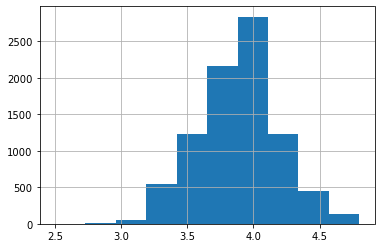

In [34]:
wine['Rating'].hist() #выводим гистограмму

На графике показано распределение количества вин относительно рейтинга

<AxesSubplot:>

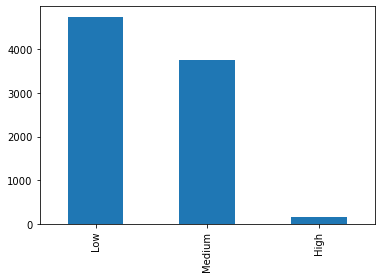

In [35]:
wine['Price Category'].value_counts().plot(kind='bar') #для категориальных переменных используем столбчатую диаграмму

<AxesSubplot:xlabel='Rating Category'>

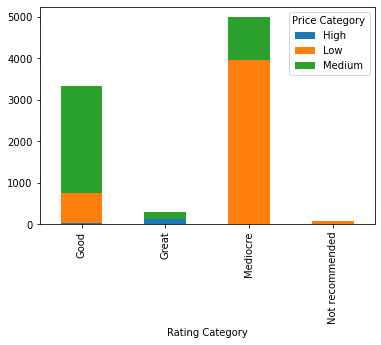

In [36]:
wine.groupby('Rating Category')['Price Category'].value_counts().unstack().plot(kind='bar', stacked=True)

Визуализировали категориальные данные

In [37]:
wine['Price'].mean()  #найдем среднеарифметический показатель цены

39.145064620356315

In [38]:
wine['Price'].median()  #найдем медианное значение цены

18.2

In [39]:
wine['Price'].mode()  #найдем моду показателя цены

0    9.9
Name: Price, dtype: float64

In [40]:
wine['NumberOfRatings'].mean()  #найдем среднеарифметический показатель количества отзывов

415.2874451880914

In [41]:
wine['NumberOfRatings'].median()  #найдем медианное значение количества отзывов

157.0

In [42]:
wine['NumberOfRatings'].mode()  #найдем моду показателя количества отзывов

0    30
Name: NumberOfRatings, dtype: int64

In [43]:
wine.describe() #данная функция помогает подробно изучить показатели

,Rating,NumberOfRatings,Price,Recommended budget wines
count,8666.000000,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065,0.082853
std,0.308548,899.726373,84.936307,0.275675
min,2.500000,25.000000,3.550000,0.000000
25%,3.700000,66.000000,10.680000,0.000000
50%,3.900000,157.000000,18.200000,0.000000
75%,4.100000,401.000000,38.142500,0.000000
max,4.800000,20293.000000,3410.790000,1.000000


Столбец "Recommended budget wines" включает бинарные данные, поэтому значения в этой таблице для данного показателя являются неинформативными. Поэтому необходимо отфильтровать данные:

In [44]:
wine[['Rating', 'NumberOfRatings', 'Price']].describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


Посмотрим сколько в среднем отзывов оставляли на сайте для каждой категории вина по рейтингу:

In [45]:
wine.groupby('Rating Category')['NumberOfRatings'].mean()

Rating Category
Good               449.308225
Great              582.348432
Mediocre           387.492983
Not recommended    106.638889
Name: NumberOfRatings, dtype: float64

Из данных можно сделать вывод, что больше всего отзывов оставляли для вин категории Great и меньше всего отзывов оставляют для вин с самым плохим рейтингом. Визуализируем полученные данные:

<AxesSubplot:xlabel='Rating Category'>

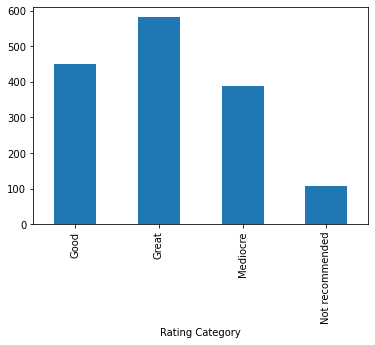

In [46]:
wine.groupby('Rating Category')['NumberOfRatings'].mean().plot(kind='bar')

In [47]:
wine.groupby('Price Category')['Rating Category'].agg(lambda x: x.value_counts().index[0]) 
#найдем популярное значение для каждой категории

Price Category
High         Great
Low       Mediocre
Medium        Good
Name: Rating Category, dtype: object

**Таким образом, дешевые вин обычно среднего качества, вина средней цены имеют хорошие отзывы и вина с высокой ценый чаще всего получаю отличные отзывы**

In [48]:
wine.pivot_table(index = 'Country', values = ['Rating', 'Price'], aggfunc = ['mean', 'median']) #составим сводную таблицу

mean            median       
                   Price    Rating   Price Rating
Country                                          
Argentina      22.374024  3.829268  13.430   3.80
Australia      41.008415  3.843089  18.910   3.80
Austria        21.499682  3.799545  14.485   3.80
Brazil         18.703000  3.502500  14.050   3.50
Bulgaria       10.150000  3.800000  10.150   3.80
Canada         14.950000  3.300000  14.950   3.30
Chile          21.492883  3.769325  12.375   3.70
China          35.000000  2.900000  35.000   2.90
Croatia        21.400000  4.100000  21.400   4.10
France         63.163732  3.935151  31.960   3.90
Georgia        21.526000  4.140000  16.900   4.10
Germany        22.188105  3.787097  16.745   3.80
Greece         17.990000  3.792308  17.290   3.70
Hungary        14.635556  3.655556  13.500   3.70
Israel         18.634615  3.807692  15.050   3.90
Italy          35.533328  3.924453  17.450   3.90
Lebanon        37.208667  4.160000  36.940   4.20
Mexico          8.650000  3.400000   8.650   3.40
Moldova        28.855000  4.162500  12.980   4.10
New Zealand    29.038254  3.747619  21.500   3.70
Portugal       20.209261  3.894348  13.550   3.90
Romania        14.500000  3.756522  11.900   3.80
Slovakia       19.900000  3.800000  19.900   3.80
Slovenia       11.905000  3.537500   8.970   3.50
South Africa   21.635620  3.860000  15.670   3.90
Spain          25.696541  3.840018  13.925   3.80
Switzerland    33.904167  3.841667  28.790   3.85
Turkey         18.600000  3.800000  14.300   3.80
United States  52.632139  3.952406  25.535   3.90
Uruguay        14.392500  3.825000  14.290   3.85

Таблица выше показывает среднее и медианное значение цены и рейтинга для каждой из стран

**Далее определим количество бюджетных недорогих вин относительно стран**

In [49]:
wine_country = pd.DataFrame(wine.groupby('Country')['Recommended budget wines'].sum())

<AxesSubplot:xlabel='Country'>

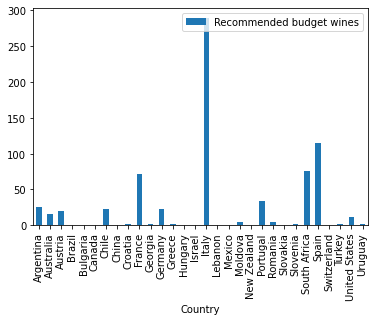

In [50]:
wine_country.plot(kind = 'bar')

На графике видно, что больше все бюджетных дешевых вин производится в Италии. Также, стоит отметить такие страны как Испания, Франция и ЮАР

In [51]:
np.percentile(wine_country['Recommended budget wines'], 75) - np.percentile(wine_country['Recommended budget wines'], 25)
#нашли интерквартильный размах

21.5

In [52]:
wine_mean = wine_country['Recommended budget wines'].mean()
deviations = wine_country['Recommended budget wines'] - wine_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(wine_country) - 1) #нашли дисперсию для выборки
std_samp = np.sqrt(variance_samp)  #нашли среднеквадратичное отклонение для выборки
print(variance_samp, std_samp)

3244.2712643678165 56.95850475888405


Найдем дисперсию и среднеквадратичное отклонение для генеральной совокупности:

In [53]:
variance_pop = sq_deviations.sum() / (len(wine_country)) #нашли дисперсию
std_pop = np.sqrt(variance_pop)  #нашли среднеквадратичное отклонение
print(variance_pop, std_pop)

3136.1288888888894 56.0011507818267


Найдем дисперсию и среднеквадратичное отклонение с помощью обычных функций:

In [54]:
print(wine_country['Recommended budget wines'].var())  #нашли дисперсию
print(wine_country['Recommended budget wines'].std())  #нашли среднеквадратичное отклонение

3244.2712643678155
56.95850475888404


In [55]:
import scipy.stats  #импортируем дополнительную библиотеку

Проведем вычисление z-оценки для колонки Rating

In [56]:
scipy.stats.zscore(wine['Rating']) #вычисление z-оценки

0       1.003658
1       1.327776
2       0.031305
3      -1.265167
4       0.031305
          ...   
8661   -0.292813
8662    0.355423
8663   -0.616931
8664   -1.265167
8665   -1.589285
Name: Rating, Length: 8666, dtype: float64

In [57]:
wine['z-score'] = scipy.stats.zscore(wine['Rating']) #сохраняем доп столбец

In [58]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category,Recommended budget wines,z-score
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good,Medium,0,1.003658
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good,Low,1,1.327776
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre,Low,0,0.031305
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre,Low,0,-1.265167
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre,Medium,0,0.031305


<AxesSubplot:>

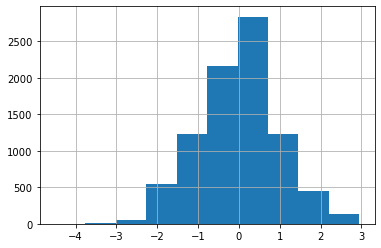

In [59]:
wine['z-score'].hist() #распределение по рейтингу вин

In [60]:
wine[wine['z-score'] < -3] #выведем позиции, у которых z-оценка меньше -3

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category,Recommended budget wines,z-score
23,Virtus Tannat 2013,Brazil,Serra Gaúcha,Monte Paschoal,2.9,100,6.77,2013,Not recommended,Low,0,-3.209874
1858,Merlot 2018,South Africa,Stellenbosch,Welmoed,2.9,175,8.32,2018,Not recommended,Low,0,-3.209874
2733,Moser Family Cabernet Sauvignon 摩塞尔家族赤霞珠 2016,China,Ningxia,Château Changyu Moser XV 张裕摩塞尔十五世酒庄,2.9,235,35.00,2016,Not recommended,Medium,0,-3.209874
3091,Syrah 2018,France,Vin de France,Maison les Alexandrins,2.8,26,9.95,2018,Not recommended,Low,0,-3.533992
4176,Marche Rosso 2015,Italy,Marche,Roberto Lucarelli,2.6,33,11.50,2015,Not recommended,Low,0,-4.182228
4542,Dolcetto d'Alba 2013,Italy,Dolcetto d'Alba,Piazzo,2.7,36,9.12,2013,Not recommended,Low,0,-3.858110
4998,Cabernet Sauvignon 2016,France,Pays d'Oc,Fortant,2.5,40,8.29,2016,Not recommended,Low,0,-4.506346
5693,Melodias Cabernet Sauvignon 2018,Argentina,Mendoza,Trapiche,2.9,47,5.95,2018,Not recommended,Low,0,-3.209874
5759,Cabernet Sauvignon 2017,Chile,Central Valley,Anderra,2.9,478,6.90,2017,Not recommended,Low,0,-3.209874
5954,Valpolicella Classico 2019,Italy,Valpolicella Classico,Bolla,2.8,50,9.49,2019,Not recommended,Low,0,-3.533992


In [61]:
wine.groupby('Price Category')['z-score'].mean()

Price Category
High      2.109472
Low      -0.572860
Medium    0.637669
Name: z-score, dtype: float64

Из таблицы можем сделать вывод, что дешевые вина имеют низкую (отрицательную) z-оценку, а дорогие вина высокую

**Расчитаем выбросы для данных Number Of Ratings**

In [62]:
wine['NumberOfRatings'].describe()

count     8666.000000
mean       415.287445
std        899.726373
min         25.000000
25%         66.000000
50%        157.000000
75%        401.000000
max      20293.000000
Name: NumberOfRatings, dtype: float64

Проверим, есть ли в данном поле выбросы:

In [63]:
q3 = np.percentile(wine['NumberOfRatings'], 75)
q1 = np.percentile(wine['NumberOfRatings'], 25)
print(q3, q1)

401.0 66.0


In [64]:
iqr = q3 - q1 #найдем интерквартильный размах
print(iqr)

335.0


In [65]:
iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-436.5 903.5


In [66]:
wine[wine['NumberOfRatings'] > iqr_threshold_top].shape   #смотрим только верхний размах, т к в нижнем отрицательное значение

(909, 12)

In [67]:
wine[wine['NumberOfRatings'] > iqr_threshold_top]['Country'].value_counts() #посмотрим выбросы по странам

Italy            266
Spain            155
France           153
United States    114
Argentina         64
Chile             57
Portugal          30
Australia         21
South Africa      20
Lebanon           12
Brazil             5
New Zealand        4
Moldova            3
Austria            3
Mexico             1
Uruguay            1
Name: Country, dtype: int64

In [68]:
wine[wine['NumberOfRatings'] > iqr_threshold_top]['Price Category'].value_counts() #посмотрим выбросы по ценовой категории

Low       511
Medium    381
High       17
Name: Price Category, dtype: int64

Очевидно, что максимальные выбросы находятся у наиболее популярных вин: по стране - Италия, по ценовой категории - дешевые вина

Посмотрим коэффициенты корреляции

In [69]:
wine['Price'].corr(wine['NumberOfRatings']) #коэффициент крайне низок - нет никакой зависимости

0.00640671680099248

In [70]:
wine['NumberOfRatings'].corr(wine['Rating']) #коэффициент крайне низок - нет никакой зависимости

0.07521644033885252

In [71]:
wine['Rating'].corr(wine['Price'])   #коэффициент выше - умеренная корреляция

0.4510596311327645

<AxesSubplot:xlabel='Rating', ylabel='Price'>

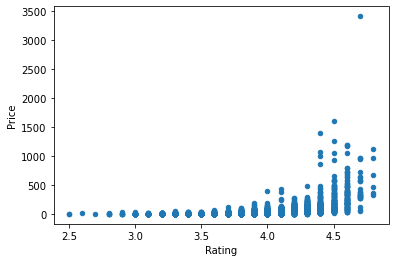

In [72]:
wine.plot('Rating', 'Price', kind = 'scatter') #визуализируем график корреляции

In [73]:
wine.corr() #посмотрим коэффициенты для всех количественных переменных

,Rating,NumberOfRatings,Price,Recommended budget wines,z-score
Rating,1.000000,0.075216,0.451060,0.173445,1.000000
NumberOfRatings,0.075216,1.000000,0.006407,0.071815,0.075216
Price,0.451060,0.006407,1.000000,-0.087665,0.451060
Recommended budget wines,0.173445,0.071815,-0.087665,1.000000,0.173445
z-score,1.000000,0.075216,0.451060,0.173445,1.000000


В датасете нет данных с сильной зависимостью

**Далее перейдем к блоку визуализации данных**

In [74]:
import matplotlib.pyplot as plt  #импортируем дополнительно библтотеку

In [75]:
country_rating = wine.groupby(wine['Country'])['Rating'].mean()
country_rating  #группируем данные про странам и считаем средний рейтинг для каждой страны

Country
Argentina        3.829268
Australia        3.843089
Austria          3.799545
Brazil           3.502500
Bulgaria         3.800000
Canada           3.300000
Chile            3.769325
China            2.900000
Croatia          4.100000
France           3.935151
Georgia          4.140000
Germany          3.787097
Greece           3.792308
Hungary          3.655556
Israel           3.807692
Italy            3.924453
Lebanon          4.160000
Mexico           3.400000
Moldova          4.162500
New Zealand      3.747619
Portugal         3.894348
Romania          3.756522
Slovakia         3.800000
Slovenia         3.537500
South Africa     3.860000
Spain            3.840018
Switzerland      3.841667
Turkey           3.800000
United States    3.952406
Uruguay          3.825000
Name: Rating, dtype: float64

Данные не очень подходят для визуализации

In [76]:
year_mean = wine.groupby(wine['Year'])['Rating'].mean()
year_mean

Year
1988    4.300000
1989    4.550000
1990    4.400000
1991    4.400000
1992    4.300000
1993    4.500000
1995    4.175000
1996    4.100000
1997    4.328571
1998    4.233333
1999    4.293333
2000    4.252632
2001    4.116667
2002    4.314286
2003    4.209091
2004    4.162963
2005    4.141558
2006    4.204545
2007    4.051163
2008    4.087500
2009    4.084524
2010    4.093103
2011    4.016187
2012    4.001078
2013    3.984752
2014    3.912782
2015    3.929513
2016    3.888851
2017    3.809820
2018    3.692630
2019    3.658621
N.V.    4.100000
Name: Rating, dtype: float64

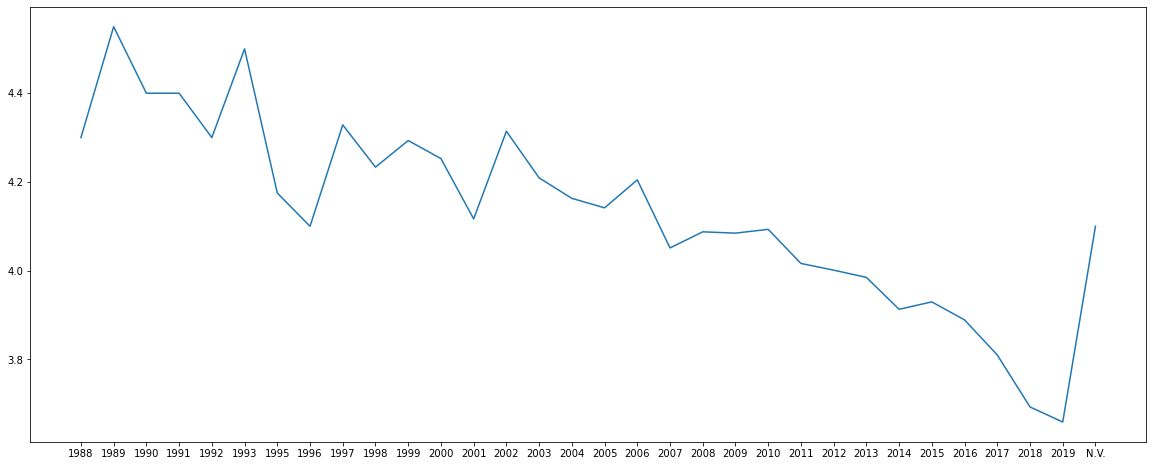

In [77]:
fig, ax = plt.subplots(figsize=(20,8)) 
ax.plot(year_mean)

*На графике видим, что прослеживается тенденция спада рейтинга вина со временем. Можно сделать вывод, что выдержанное вино имеет лушее качество, чем молодое вино*

In [78]:
price_category = wine.groupby(['Price Category', 'Price'])['NumberOfRatings'].sum()

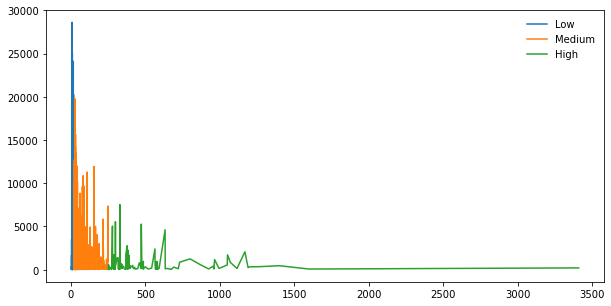

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(price_category.loc['Low'])
ax.plot(price_category.loc['Medium'])
ax.plot(price_category.loc['High'])
ax.legend(['Low', 'Medium', 'High'], frameon = False)

*Данный график показывает, что с увеличением цены уменьшается количество отзывов*

In [80]:
rating_temp = wine.groupby(['Rating Category', 'Year'])['Price'].mean()

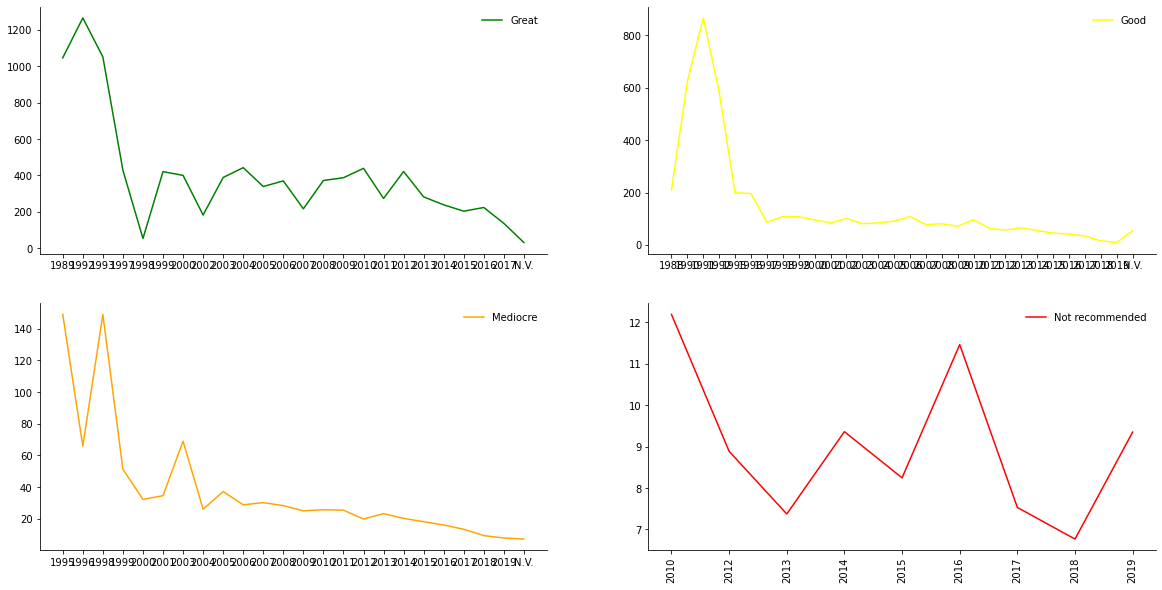

In [81]:
fig, ax = plt.subplots(2,2, figsize = (20, 10))

ax[0][0].plot(rating_temp.loc['Great'], c = 'green')
ax[0][1].plot(rating_temp.loc['Good'], c = 'yellow')
ax[1][0].plot(rating_temp.loc['Mediocre'], c = 'orange')
ax[1][1].plot(rating_temp.loc['Not recommended'], c = 'red')

for axis in ax.ravel():
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    x = plt.xticks(rotation = 90)
    
ax[0][0].legend(['Great', 'Annual average'], frameon = False)
ax[0][1].legend(['Good', 'Annual average'], frameon = False)
ax[1][0].legend(['Mediocre', 'Annual average'], frameon = False)
ax[1][1].legend(['Not recommended', 'Annual average'], frameon = False)

*На графиках выше можно проанализировать среднегодовую цену на вино в 4 разных категориях вина по качеству. Для отличных, хороших и средних вин прослеживается зависимость от года: чем старее вино, тем выше цена. Для вин плохого качества нет зависимости между ценой и годом производства*

**Далее перейдем к блоку продвинутой визуализации**

In [82]:
import seaborn as sns

In [83]:
num_features = ['Rating', 'NumberOfRatings', 'Price']
cat_features = ['Rating Category', 'Price Category', 'Recommended budget wines']

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

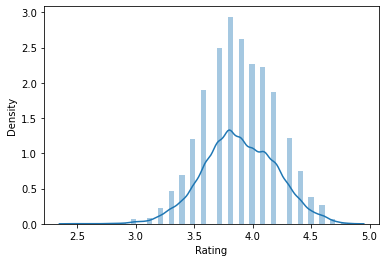

In [84]:
sns.distplot(wine['Rating'])  #посмотрим распределение для рейтинга

***Прошу не обращать внимание на красные блоки, это не ошибка, а предупреждение***

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfRatings', ylabel='Density'>

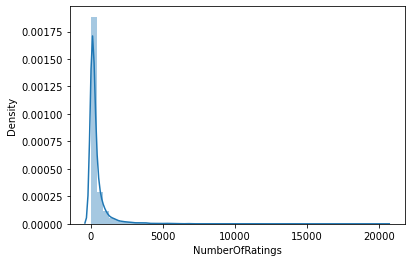

In [85]:
sns.distplot(wine['NumberOfRatings']) #посмотрим распределения количества рейтингов

In [86]:
wine['Price Category'].value_counts()

Low       4751
Medium    3762
High       153
Name: Price Category, dtype: int64

<AxesSubplot:ylabel='Price Category'>

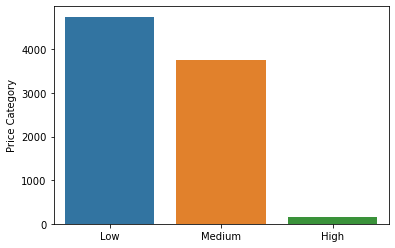

In [87]:
sns.barplot(x = wine['Price Category'].value_counts().index, y = wine['Price Category'].value_counts())

<AxesSubplot:xlabel='Price Category', ylabel='Rating'>

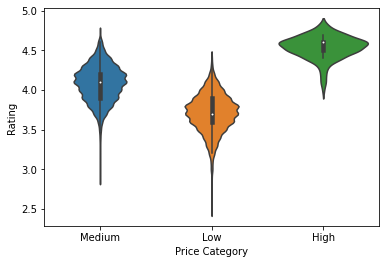

In [88]:
sns.violinplot(x = wine['Price Category'], y = wine['Rating'])     #построим скрипичный график

На данном графике мы видим распределения рейтинга относительно винных ценовых категорий

<AxesSubplot:xlabel='Price Category', ylabel='Rating'>

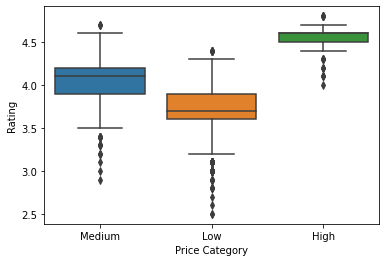

In [89]:
sns.boxplot(x = wine['Price Category'], y = wine['Rating'])     #построим график с усами

Построим тепловую карту:

In [90]:
correlation = wine.corr().loc[num_features, num_features]
correlation

,Rating,NumberOfRatings,Price
Rating,1.000000,0.075216,0.451060
NumberOfRatings,0.075216,1.000000,0.006407
Price,0.451060,0.006407,1.000000


<AxesSubplot:>

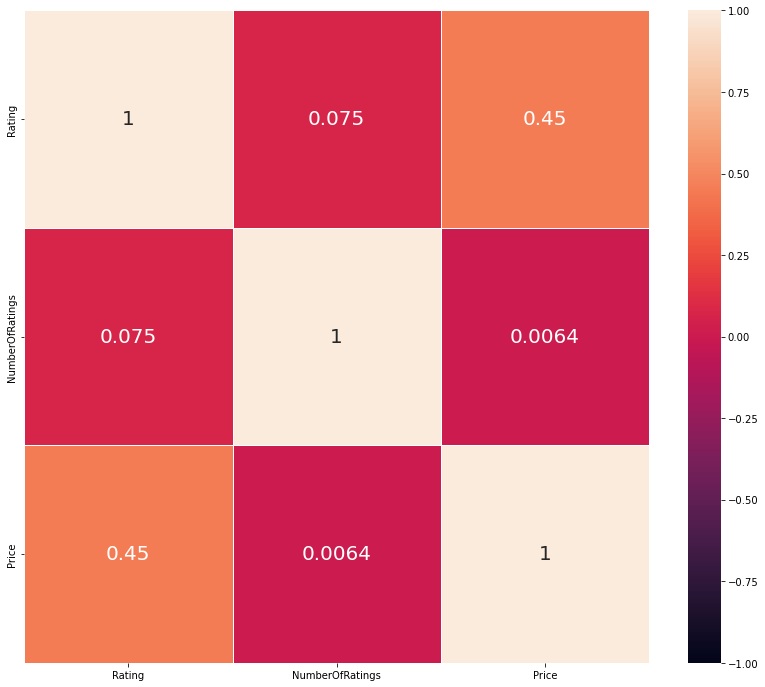

In [91]:
fig, ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, annot = True, linecolor = 'white', linewidth = 0.5, annot_kws = {'size' : 20}, vmax = 1, vmin = -1)

Видим, что сильной корреляции между показателями нет

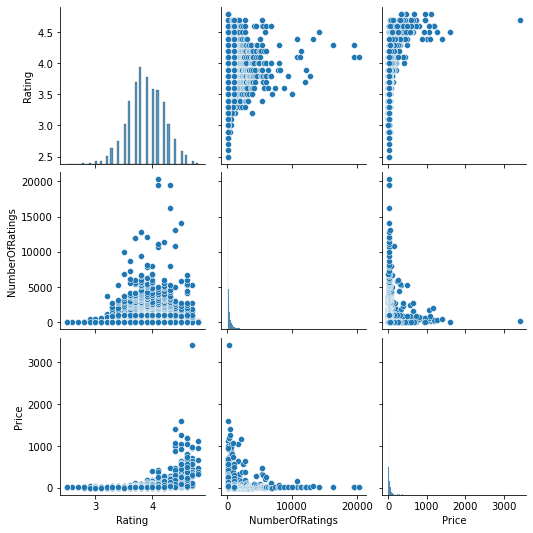

In [92]:
sns.pairplot(wine[num_features])   #строим графики рассеяния 

Выведем разные графики для показателя Rating

In [93]:
wine_melted = pd.melt(wine, id_vars = 'Rating', value_vars = cat_features)

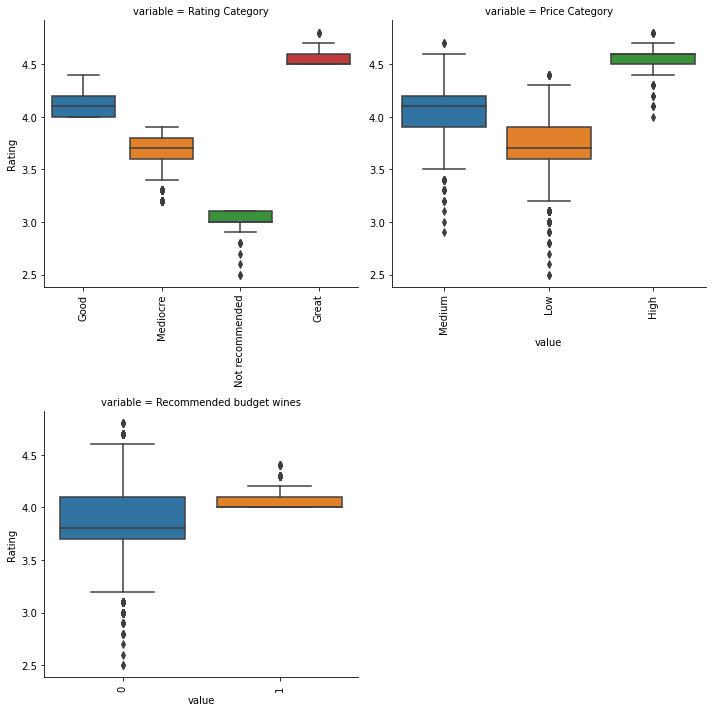

In [94]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation = 90)
    
g = sns.FacetGrid(wine_melted, col = "variable",
                 col_wrap = 2, sharex = False, sharey = False, height = 5)

g.map(boxplot, 'value', 'Rating')

*На верхнем левом графике отображается зависимость рейтинга вина от цены; на верхнем правим видим зависимость ценовой категории и рейтинга вина; и на нижнем графики видим зависимость от рейтинга показателя Recommended budget wines*

**Критерий Хи-квадрат**

In [95]:
ct_o = wine.groupby('Rating Category')['Price Category'].value_counts().unstack()
ct_o

Price Category,High,Low,Medium
Rating Category,,,
Good,32.0,718.0,2569.0
Great,121.0,NaN,166.0
Mediocre,NaN,3964.0,1024.0
Not recommended,NaN,69.0,3.0


*dof - (R - 1)(C - 1)*

In [96]:
alpha = 0.01
dof = (2 - 1)*(2 - 1)
print(dof)
critical_value = 11.3

1


In [97]:
n_total = ct_o.sum()
print(n_total)

Price Category
High       153.0
Low       4751.0
Medium    3762.0
dtype: float64


In [98]:
n_total = ct_o.sum().sum()
print(n_total)

8666.0


**Проверим гипотезу: Цена вина зависит от рейтинга**

Для проверки гипотезы расчитаем Хи-квадрат

In [99]:
scipy.stats.chi2_contingency(ct_o, correction = False)

(nan,
 nan,
 6,
 array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]))

Число 6 говорит о том, что зависимость есть

In [100]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Rating Category,Price Category,Recommended budget wines,z-score
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Good,Medium,0,1.003658
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Good,Low,1,1.327776
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Mediocre,Low,0,0.031305
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Mediocre,Low,0,-1.265167
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Mediocre,Medium,0,0.031305


**Проведем Т-тест**

Гипотеза такая: Рейтинг зависит от цены

In [101]:
high_price = wine[wine['Price Category'] == 'High']['Rating']
medium_price = wine[wine['Price Category'] == 'Medium']['Rating']
low_price = wine[wine['Price Category'] == 'Low']['Rating']

Проверим, является ли распределение нормальным:

<AxesSubplot:>

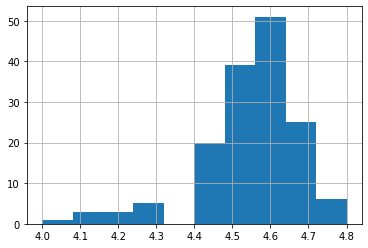

In [102]:
high_price.hist()

<AxesSubplot:>

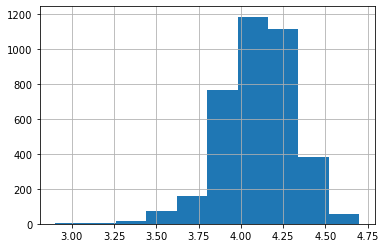

In [103]:
medium_price.hist()

<AxesSubplot:>

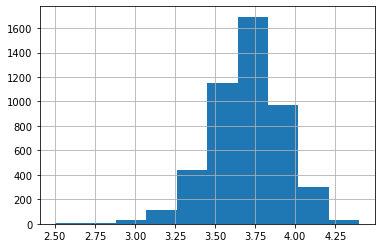

In [104]:
low_price.hist()

In [105]:
print(high_price.var())  #расчитаем дисперсии
print(medium_price.var())
print(low_price.var())

0.02099071207430341
0.05159057514226141
0.05660244735180414


In [106]:
n_high = len(high_price)   #расчитаем необходимые показатели
n_medium = len(medium_price)
n_low = len(low_price)
var_high = high_price.var()
var_medium = medium_price.var()
var_low = low_price.var()

In [107]:
v_high = var_high / n_high
v_medium = var_medium / n_medium
v_low = var_low / n_low
dof_welch = (v_high + v_medium + v_low)**2 / (v_high**2 / (v_high - 1) + v_medium**2 / (v_medium - 1) + v_low**2 / (v_low - 1))
print(dof_welch)

-1.3840302402796665


In [108]:
def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print('Отвергаем НО. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть НО')
        
t_critical = 1.9667

In [109]:
s_m1_m2_m3 = np.sqrt(v_high + v_medium + v_low)
print(s_m1_m2_m3)

0.012760156592944704


In [110]:
mean_high = high_price.mean()
mean_medium = medium_price.mean()
mean_low = low_price.mean()
print(mean_high, mean_medium, mean_low)

4.54117647058824 4.087081339712925 3.71359713744475


In [111]:
t = (mean_high - mean_medium - mean_low)/ s_m1_m2_m3  #находим т-значение
print(t)

-255.44373086860597


In [112]:
hypothesis_check(t, t_critical)

Отвергаем НО. Разница между средними статистически значима.


**Линейная регрессия**

In [113]:
import seaborn as sns
import statsmodels.api as sm

In [114]:
rating_mean = wine.groupby(wine['Country'])['Rating'].mean()
numberofratings_sum = wine.groupby(wine['Country'])['NumberOfRatings'].sum()
price_mean = wine.groupby(wine['Country'])['Price'].mean()

wine_country = pd.concat([ rating_mean, numberofratings_sum, price_mean], axis = 1)
wine_country.head()

,Rating,NumberOfRatings,Price
Country,,,
Argentina,3.829268,223251,22.374024
Australia,3.843089,96566,41.008415
Austria,3.799545,27479,21.499682
Brazil,3.502500,22141,18.703000
Bulgaria,3.800000,898,10.150000


Проверка предпосылок:

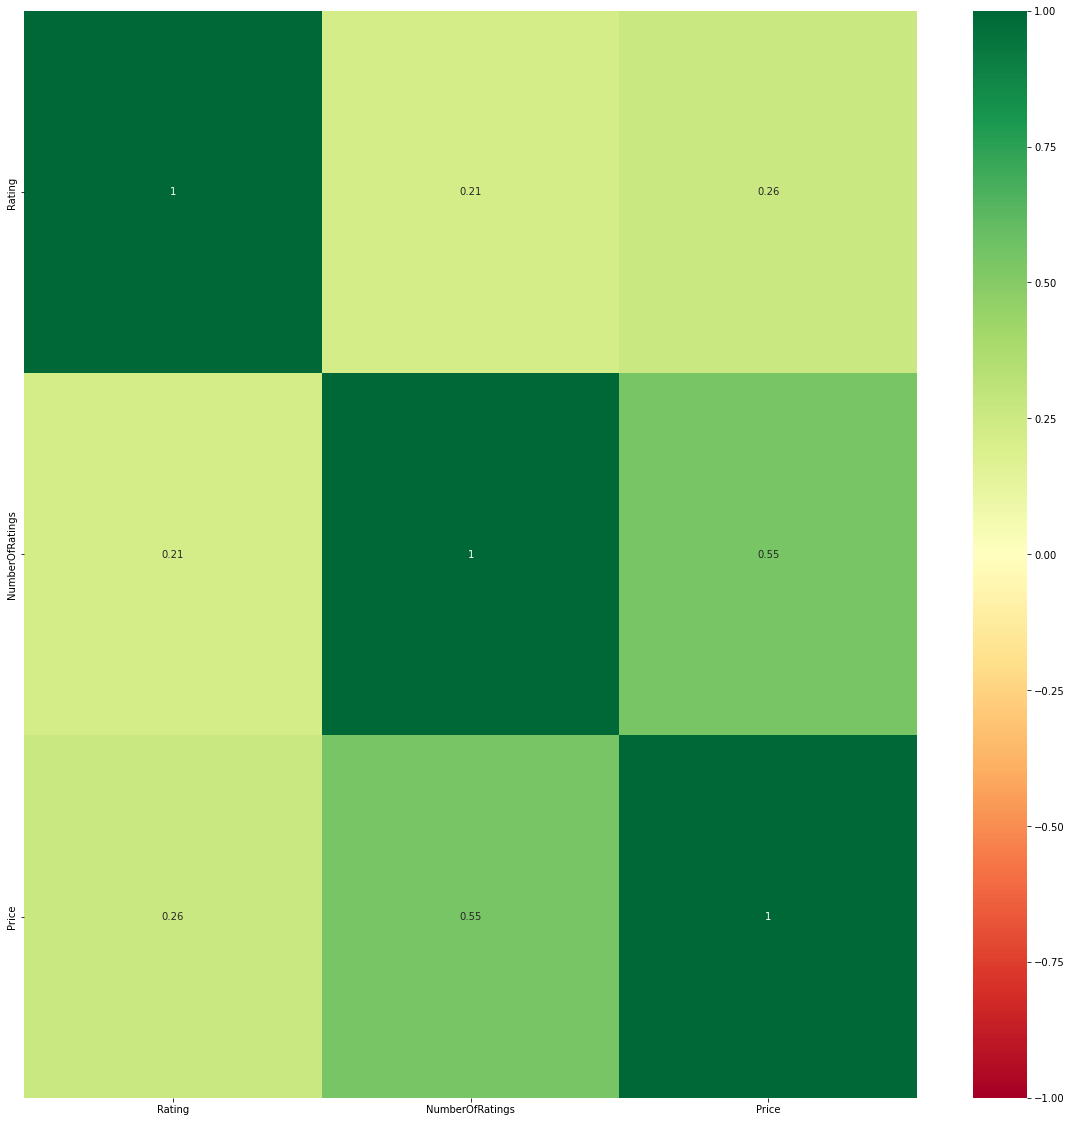

In [115]:
plt.figure(figsize = (20,20))
p = sns.heatmap(wine_country.corr(), annot = True, cmap='RdYlGn', vmax = 1, vmin = -1)

Проверяем линейную взаимосвязь:

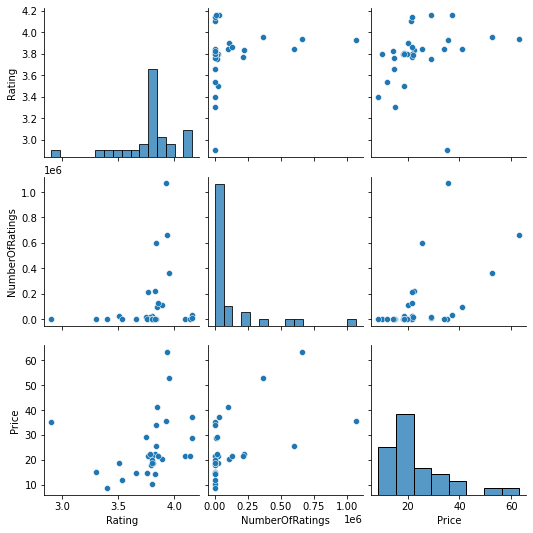

In [116]:
sns.pairplot(wine_country)

In [117]:
X = wine_country['Rating']
y = wine_country['Price']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=12.309234305546797, intercept=-21.97576993893536, rvalue=0.26044700699690154, pvalue=0.164517452954656, stderr=8.623421158094615, intercept_stderr=32.68833962464422)


In [118]:
r_sq = res.rvalue**2      #вычисляем коэффициент детерминации
print(r_sq)

0.06783264345364408


Показатель 0.7 является не очень хорошим для объяснения модели

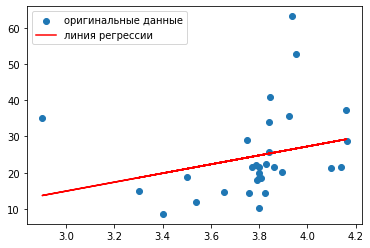

In [119]:
plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()

Линейная регрессия слабо просматривается

Для построения **статистической регрессии** в данном датасете недостаточно данных

***Основные выводы из всей проделанной работы. На итоговую оценку красного вина пользователями Vivino влияют разные факторы: год производства вина, цена, страна. Количество отзывов на сайте зависит от цены бутылки: для дешевых вин оставляют отзывов больше, чем для дорогих. Так же, коррелируются количество отзывов и рейтинг вина: для хороших вин был оставлено намного больше отзывов, чем для плохих.***